In [3]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))

In [4]:
df.columns.to_list()

['Film',
 'Země původu',
 'Copyright',
 'Rok výroby',
 'Premiéra',
 'Minutáž',
 'Režie',
 'Kategorie',
 'Žánr',
 'Typologie',
 'Originální název',
 'Český název',
 'Anglický název',
 'Souběžný název',
 'Pracovní název',
 'Hrají',
 'Postavy',
 'Pomocná režie',
 'Asistent režie',
 'Původní filmový námět',
 'Scénář',
 'Dramaturg',
 'Kamera',
 'Asistent kamery',
 'Architekt',
 'Návrhy kostýmů',
 'Masky',
 'Střih',
 'Zvuk',
 'Producent',
 'Vedoucí výroby',
 'Zástupce vedoucího výroby',
 'Odborný poradce',
 'Hudba',
 'Choreografie',
 'Lokace',
 'Distribuční slogan',
 'Výrobce',
 'S podporou',
 'Nositelé copyrightu',
 'Distribuce',
 'Délka',
 'Distribuční nosič',
 'Poměr stran',
 'Barva',
 'Zvukový systém/formát',
 'Verze',
 'Mluveno',
 'Podtitulky',
 'Úvodní/závěrečné titulky',
 'Anotace',
 'Obsah',
 'Technický scénář',
 'Výtvarník',
 'Animace',
 'Triky',
 'Postprodukce',
 'Návrhy titulků',
 'Pedagogické vedení',
 'Použitá hudba',
 'Studentský film',
 'Původní metráž',
 'Mezititulky',
 'Ocen

In [5]:
df.explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(30)

Režie
Otakar Vávra (9507)           1014
Martin Frič (20324)            821
Karel Kachyňa (3526)           813
Václav Vorlíček (1044)         684
Karel Steklý (35894)           673
Dušan Klein (2568)             635
Oldřich Lipský (7883)          609
Zdeněk Troška (3874)           583
Jaroslav Balík (4940)          556
Vladimír Čech (7871)           533
Ivo Novák (7889)               532
Zdeněk Podskalský (4749)       526
Jindřich Polák (7891)          518
Miroslav Cikán (31969)         517
Václav Krška (20325)           508
Antonín Kachlík (7880)         504
Václav Matějka (29527)         491
Juraj Herz (7875)              483
Vladimír Slavínský (31967)     479
Tomáš Vorel (106)              478
Zbyněk Brynych (4881)          468
Jiří Hanibal (7873)            448
Jaromil Jireš (5317)           443
Jan Hřebejk (4831)             427
Josef Mach (7885)              425
Jiří Krejčík (7882)            422
Jaroslav Soukup (1171)         411
Ladislav Rychman (7892)        402
Svatopluk Inne

In [6]:
velikost_herectva = pd.Series(df.explode("Hrají").groupby("Film")["Hrají"].nunique(), name="Velikost herectva")

In [8]:
df = df.merge(velikost_herectva, on="Film")

In [13]:
df.explode("Režie").groupby("Režie")["Velikost herectva"].mean().nlargest(50)

Režie
Mirjam Landa /ž/ (11733)                     111.000000
Jan Lengyel (2134)                            93.000000
Václav Marhoul (3781)                         84.000000
Martin Dolenský (652)                         81.000000
Jan Kraus (1062)                              79.000000
Michal Caban (7826)                           76.000000
Vlastimil Peška (76347)                       76.000000
Šimon Caban (7827)                            76.000000
Julius Ševčík (149)                           73.333333
Vlado Štancel (27084)                         72.666667
Pjeer Van Eck (24908)                         72.000000
Martin Campbell (28668)                       71.000000
Tomáš Zelenka (27642)                         70.000000
Jakub Sluka (3584)                            69.000000
Hannes Zell (51867)                           67.000000
Pavel Dražan (74966)                          65.000000
Karel Hřib (84118)                            63.000000
Vojtěch Trapl (5107)                      

In [12]:
df.explode("Režie").groupby("Režie")["Velikost herectva"].median().nlargest(10)

Režie
Mirjam Landa /ž/ (11733)    111.0
Jan Lengyel (2134)           93.0
Václav Marhoul (3781)        84.0
Martin Dolenský (652)        81.0
Jan Kraus (1062)             79.0
Michal Caban (7826)          76.0
Vlastimil Peška (76347)      76.0
Šimon Caban (7827)           76.0
Pjeer Van Eck (24908)        72.0
Martin Campbell (28668)      71.0
Name: Velikost herectva, dtype: float64

In [ ]:
df.explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(30)

In [38]:
nejobsazovanejsi = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(500).index.to_list()
df_nejobsazovanejsi = df.explode("Hrají")
df_nejobsazovanejsi = df_nejobsazovanejsi[df_nejobsazovanejsi["Hrají"].isin(nejobsazovanejsi)]
df_nejobsazovanejsi.explode("Režie").groupby("Režie")["Hrají"].nunique().nlargest(30)

Režie
Otakar Vávra (9507)           328
Martin Frič (20324)           287
Karel Steklý (35894)          285
Karel Kachyňa (3526)          235
Oldřich Lipský (7883)         233
Ivo Novák (7889)              230
Josef Mach (7885)             229
Vladimír Čech (7871)          229
Václav Vorlíček (1044)        228
Zdeněk Podskalský (4749)      217
Miroslav Cikán (31969)        215
Dušan Klein (2568)            210
Václav Krška (20325)          199
Jindřich Polák (7891)         195
Jiří Krejčík (7882)           193
Jaroslav Balík (4940)         187
Jiří Sequens (7893)           180
Zbyněk Brynych (4881)         180
Vladimír Slavínský (31967)    174
Jiří Hanibal (7873)           170
Bořivoj Zeman (8886)          162
Václav Gajer (5065)           159
Václav Matějka (29527)        159
Hynek Bočan (2947)            158
Václav Kubásek (37286)        153
Štěpán Skalský (8999)         153
Antonín Kachlík (7880)        151
Petr Schulhoff (7896)         143
Václav Binovec (37467)        141
Jaroslav

In [ ]:
df.explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(30)

In [15]:
df.explode("Režie").explode("Žánr").groupby("Režie")["Žánr"].nunique().nlargest(10)

Režie
Martin Frič (20324)           26
Otakar Vávra (9507)           25
Věra Chytilová (1555)         23
Evald Schorm (7895)           22
Karel Kachyňa (3526)          19
Jaromil Jireš (5317)          16
Svatopluk Innemann (33860)    16
Václav Vorlíček (1044)        16
neuvedeno                     16
Elmar Klos (4742)             15
Name: Žánr, dtype: int64

In [20]:
df.explode("Režie").explode("Kostýmy").groupby("Režie")["Kostýmy"].nunique().nlargest(5)

Režie
Karel Kachyňa (3526)    29
Martin Frič (20324)     27
Otakar Vávra (9507)     25
Vladimír Čech (7871)    23
Jiří Hanibal (7873)     22
Name: Kostýmy, dtype: int64

In [17]:
df.explode("Režie").explode("Typologie").groupby("Režie")["Typologie"].nunique().nlargest(5)

Režie
Jan Němec (3041)       6
neuvedeno              6
Dušan Hanák (9706)     5
Evald Schorm (7895)    5
Jakub Kohák (2024)     5
Name: Typologie, dtype: int64

In [18]:
df.explode("Režie").explode("Kategorie").groupby("Režie")["Kategorie"].nunique().nlargest(5)

Režie
Jan Balej (211)           4
Aurel Klimt (1189)        3
Břetislav Pojar (3113)    3
David Súkup (3104)        3
Evald Schorm (7895)       3
Name: Kategorie, dtype: int64

In [12]:
df.explode("Hrají")["Hrají"].nunique()

16194

In [5]:
df.explode("Režie").explode("Scénář").groupby("Režie")["Scénář"].nunique().nlargest(10)

Režie
Martin Frič (20324)           75
Miroslav Cikán (31969)        41
Václav Binovec (37467)        41
Vladimír Čech (7871)          37
Svatopluk Innemann (33860)    35
Tomáš Vorel (106)             34
Karel Lamač (37847)           29
Karel Kachyňa (3526)          27
Oldřich Lipský (7883)         27
Otakar Vávra (9507)           27
Name: Scénář, dtype: int64

In [6]:
df.explode("Režie").explode("Kamera").groupby("Režie")["Kamera"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)        48
J. A. Holman (37290)       32
Helena Třeštíková (709)    30
Martin Frič (20324)        27
Pavel Abrahám (19039)      27
Václav Kubásek (37286)     22
Adolf Zika (1207)          21
Václav Binovec (37467)     21
Ivo Novák (7889)           20
Václav Vorlíček (1044)     20
Name: Kamera, dtype: int64

In [19]:
df.explode("Režie").explode("Dirigent").groupby("Režie")["Dirigent"].nunique().nlargest(10)

Režie
Jan Hřebejk (4831)       12
Matej Mináč (7608)        9
Filip Renč (558)          7
Petr Nikolaev (540)       6
David Ondříček (2028)     5
Viktor Polesný (7797)     5
Jan Svěrák (476)          4
Jiří Vejdělek (24168)     4
Miroslav Janek (536)      4
Pavel Koutecký (566)      4
Name: Dirigent, dtype: int64

In [10]:
df.explode("Režie").explode("Střih").groupby("Režie")["Střih"].nunique().nlargest(10)

Režie
Karel Vachek (565)                 16
Břetislav Pojar (3113)             15
Karel Kachyňa (3526)               12
Tomáš Vorel (106)                  12
Věra Chytilová (1555)              12
Milan Cieslar (3593)               11
české verze K. M. Walló (51350)    11
Evald Schorm (7895)                10
Karel Lamač (37847)                10
Vladimír Slavínský (31967)         10
Name: Střih, dtype: int64

In [11]:
df.explode("Režie").explode("Pomocná režie").groupby("Režie")["Pomocná režie"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)       20
Pavel Abrahám (19039)     20
Karel Kachyňa (3526)      19
Jaromil Jireš (5317)      17
Jindřich Polák (7891)     16
Jiří Hanibal (7873)       16
Ivo Novák (7889)          15
Václav Matějka (29527)    15
Věra Chytilová (1555)     15
Dušan Klein (2568)        13
Name: Pomocná režie, dtype: int64

In [13]:
df.explode("Kamera").explode("Hrají").groupby("Kamera")["Hrají"].nunique().nlargest(10)

Kamera
Vladimír Smutný (1772)    1165
Jan Stallich (126242)      999
Jaromír Šofr (4285)        965
Václav Hanuš (18126)       950
Jiří Macháně (11743)       948
Ivan Šlapeta (2968)        937
Josef Vaniš (9510)         893
Jan Čuřík (4946)           865
Josef Střecha (55613)      844
Jan Roth (6557)            811
Name: Hrají, dtype: int64

In [17]:
kariery_reziseru = pd.Series(df.explode("Režie").groupby("Režie")["Copyright"].max() -df.explode("Režie").groupby("Režie")["Copyright"].min(), name="Kariéry režisérů")

In [19]:
kariery_reziseru.sort_values(ascending=False).nlargest(15)

Režie
Břetislav Pojar (3113)    60
Karel Vachek (565)        59
Otakar Vávra (9507)       59
Hermína Týrlová (4754)    58
Václav Vorlíček (1044)    57
Jan Němec (3041)          56
Dušan Klein (2568)        55
Jiří Menzel (7887)        52
Jan Švankmajer (406)      50
Vojtěch Jasný (4666)      50
Karel Kachyňa (3526)      50
Rajko Grlić (80991)       47
Věra Chytilová (1555)     47
Jiří Adamec (28467)       46
František Filip (7822)    46
Name: Kariéry režisérů, dtype: int64

<AxesSubplot:ylabel='Frequency'>

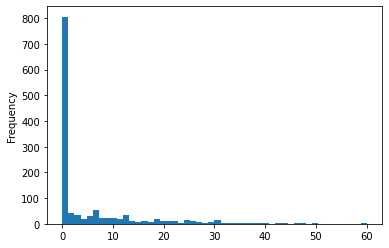

In [26]:
kariery_reziseru.plot.hist(bins=50)